## Saturation analyses on the Lx, for whole genome

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
dir_Lx = '../out/20.0909 Lx/'
recall_cutoff = 0.95
#Lx_range = [25, 75, 100, 200, 300]
Lx_range = [25, 100, 200, 300]

### reduced model top 10 feat, mean

In [171]:
def getPct(x, model_name, cutoff=0.95):
    # get the fraction of targets with recall > cutoff
    # given as is refering to Lx
    df_results = pd.read_csv('%s/L%sonly_reg_rf_boruta_all/model_results.csv' % (dir_Lx, x))
    
    #genes_pass = df_results.loc[df_results.score_test>0,'target']
    #genes_pass = df_results.loc[(df_results.score_train - df_results.score_test) < 0.1,'target']
    #df_results = df_results.loc[df_results.target.isin(set(genes_pass)),:].copy()
    
    df_results = df_results.loc[df_results.model == model_name,:].copy()
    n_total = df_results.shape[0]
    n_pass = sum(df_results.corr_test_recall > cutoff)
                
    return n_total, n_pass/n_total, np.nanmean(df_results.corr_test), np.nanmean(df_results.score_test), np.nanmean(df_results.score_train)
    
def getStats(model_name):
    df_stats = {'Lx':[], 'recall_pct':[], 'mean_corr':[], 'mean_R2_test':[], 'mean_R2_train':[], 'n':[]}
    for x in Lx_range:
        df_stats['Lx'].append(x)
        n, recall_pct, mean_corr, mean_R2_test, mean_R2_train = getPct(x, model_name, recall_cutoff)
        df_stats['recall_pct'].append(recall_pct)
        df_stats['mean_corr'].append(mean_corr)
        df_stats['mean_R2_test'].append(mean_R2_test)
        df_stats['mean_R2_train'].append(mean_R2_train)
        df_stats['n'].append(n)
    df_stats = pd.DataFrame(df_stats)
    return df_stats

In [172]:
df_stats = getStats('top10feat')
df_stats

,Lx,recall_pct,mean_corr,mean_R2_test,mean_R2_train,n
0,25,0.139093,0.051634,-0.068053,0.280914,16507
1,100,0.260729,0.113942,-0.026150,0.388743,18222
2,200,0.337688,0.147208,-0.006163,0.433879,18141
3,300,0.375242,0.162597,0.004070,0.452212,18047


[Text(0.5, 0, 'Lx'), Text(0, 0.5, '% targets with recall > 0.95')]

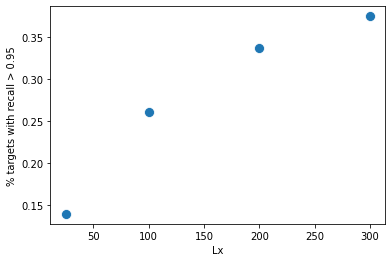

In [173]:
ax = sns.scatterplot(df_stats.Lx, df_stats.recall_pct, s=100)
ax.set(xlabel='Lx', ylabel='%% targets with recall > %s' % recall_cutoff)

[Text(0.5, 0, 'Lx'), Text(0, 0.5, 'Normalized % targets with recall > 0.95')]

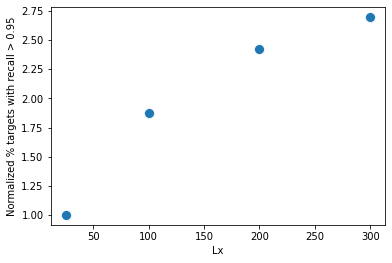

In [174]:
ax = sns.scatterplot(df_stats.Lx, df_stats.recall_pct / df_stats.recall_pct[0], s=100)
ax.set(xlabel='Lx', ylabel='Normalized %% targets with recall > %s' % recall_cutoff)

[Text(0.5, 0, 'Lx'), Text(0, 0.5, 'Mean correlation (rho)')]

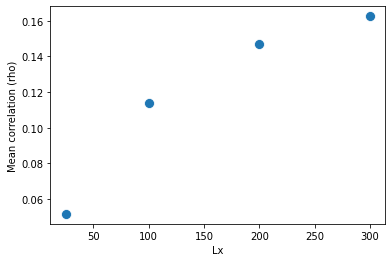

In [175]:
ax = sns.scatterplot(df_stats.Lx, df_stats.mean_corr, s=100)
ax.set(xlabel='Lx', ylabel='Mean correlation (rho)')

[Text(0.5, 0, 'Lx'), Text(0, 0.5, 'Normalized Mean correlation (rho)')]

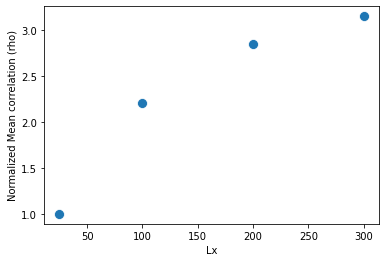

In [176]:
ax = sns.scatterplot(df_stats.Lx, df_stats.mean_corr / df_stats.mean_corr[0], s=100)
ax.set(xlabel='Lx', ylabel='Normalized Mean correlation (rho)')

[Text(0.5, 0, 'Lx'), Text(0, 0.5, 'Mean R2')]

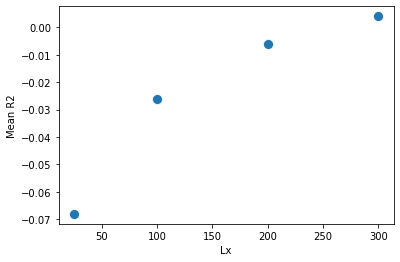

In [177]:
ax = sns.scatterplot(df_stats.Lx, df_stats.mean_R2_test, s=100)
ax.set(xlabel='Lx', ylabel='Mean R2')

[Text(0.5, 0, 'Lx'), Text(0, 0.5, 'Normalized Mean R2')]

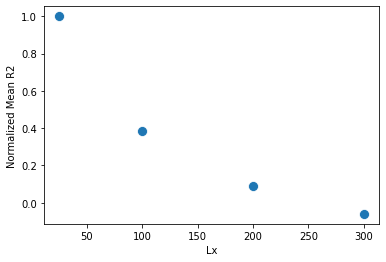

In [178]:
ax = sns.scatterplot(df_stats.Lx, df_stats.mean_R2_test / df_stats.mean_R2_test[0], s=100)
ax.set(xlabel='Lx', ylabel='Normalized Mean R2')

### reduced model top 10 feat, median

In [179]:
def getPct(x, model_name, cutoff=0.95):
    # get the fraction of targets with recall > cutoff
    # given as is refering to Lx
    df_results = pd.read_csv('%s/L%sonly_reg_rf_boruta_all/model_results.csv' % (dir_Lx, x))
    
    #genes_pass = df_results.loc[df_results.score_test>0,'target']
    #genes_pass = df_results.loc[(df_results.score_train - df_results.score_test) < 0.1,'target']
    #df_results = df_results.loc[df_results.target.isin(set(genes_pass)),:].copy()
    
    df_results = df_results.loc[df_results.model == model_name,:].copy()
    n_total = df_results.shape[0]
    n_pass = sum(df_results.corr_test_recall > cutoff)
                
    return n_total, n_pass/n_total, np.nanmedian(df_results.corr_test), np.nanmedian(df_results.score_test), np.nanmedian(df_results.score_train)
    
def getStats(model_name):
    df_stats = {'Lx':[], 'recall_pct':[], 'med_corr':[], 'med_R2_test':[], 'med_R2_train':[], 'n':[]}
    for x in Lx_range:
        df_stats['Lx'].append(x)
        n, recall_pct, med_corr, med_R2_test, med_R2_train = getPct(x, model_name, recall_cutoff)
        df_stats['recall_pct'].append(recall_pct)
        df_stats['med_corr'].append(med_corr)
        df_stats['med_R2_test'].append(med_R2_test)
        df_stats['med_R2_train'].append(med_R2_train)
        df_stats['n'].append(n)
    df_stats = pd.DataFrame(df_stats)
    return df_stats

In [180]:
df_stats = getStats('top10feat')
df_stats

,Lx,recall_pct,med_corr,med_R2_test,med_R2_train,n
0,25,0.139093,0.047550,-0.065761,0.271612,16507
1,100,0.260729,0.104086,-0.031741,0.384168,18222
2,200,0.337688,0.139498,-0.012504,0.430771,18141
3,300,0.375242,0.152985,-0.004447,0.446097,18047


[Text(0.5, 0, 'Lx'), Text(0, 0.5, '% targets with recall > 0.95')]

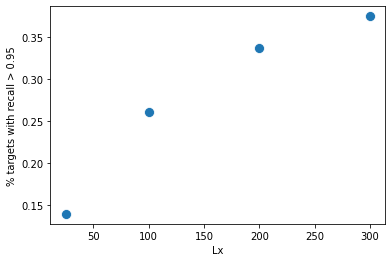

In [181]:
ax = sns.scatterplot(df_stats.Lx, df_stats.recall_pct, s=100)
ax.set(xlabel='Lx', ylabel='%% targets with recall > %s' % recall_cutoff)

[Text(0.5, 0, 'Lx'), Text(0, 0.5, 'Normalized % targets with recall > 0.95')]

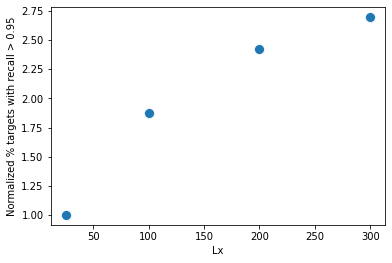

In [182]:
ax = sns.scatterplot(df_stats.Lx, df_stats.recall_pct / df_stats.recall_pct[0], s=100)
ax.set(xlabel='Lx', ylabel='Normalized %% targets with recall > %s' % recall_cutoff)

[Text(0.5, 0, 'Lx'), Text(0, 0.5, 'Median correlation (rho)')]

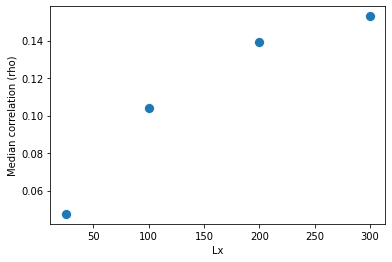

In [183]:
ax = sns.scatterplot(df_stats.Lx, df_stats.med_corr, s=100)
ax.set(xlabel='Lx', ylabel='Median correlation (rho)')

[Text(0.5, 0, 'Lx'), Text(0, 0.5, 'Normalized Median correlation (rho)')]

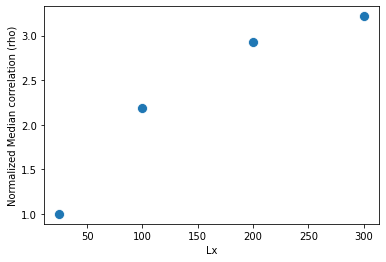

In [184]:
ax = sns.scatterplot(df_stats.Lx, df_stats.med_corr / df_stats.med_corr[0], s=100)
ax.set(xlabel='Lx', ylabel='Normalized Median correlation (rho)')

[Text(0.5, 0, 'Lx'), Text(0, 0.5, 'Median R2')]

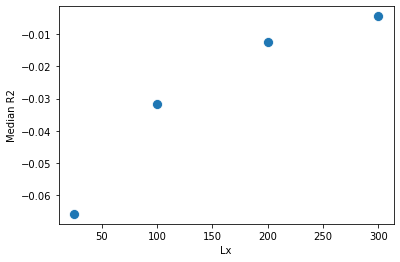

In [185]:
ax = sns.scatterplot(df_stats.Lx, df_stats.med_R2_test, s=100)
ax.set(xlabel='Lx', ylabel='Median R2')

[Text(0.5, 0, 'Lx'), Text(0, 0.5, 'Normalized Median R2')]

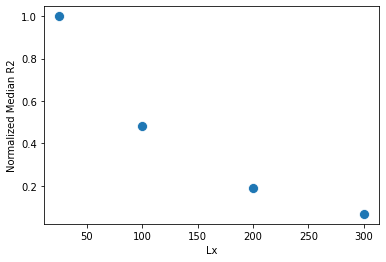

In [186]:
ax = sns.scatterplot(df_stats.Lx, df_stats.med_R2_test / df_stats.med_R2_test[0], s=100)
ax.set(xlabel='Lx', ylabel='Normalized Median R2')

### final

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
dir_Lx = '../out/20.0909 Lx/'
recall_cutoff = 0.95
Lx_range = [25, 100, 200, 300]

In [12]:
def getLxPct(x, model_name, cutoff=0.95):
    # get the fraction of targets with recall > cutoff
    # given as is refering to Lx
    df_results = pd.read_csv('%s/L%sonly_reg_rf_boruta_all/model_results.csv' % (dir_Lx, x))

    df_results = df_results.loc[df_results.model == model_name,:].copy()
    n_total = df_results.shape[0]
    n_pass = sum(df_results.corr_test_recall > cutoff)
                
    return n_pass/n_total
    
def getLxStats(model_name):
    df_stats = {'Lx':[], 'recall_pct':[]}
    for x in Lx_range:
        df_stats['Lx'].append(x)
        recall_pct = getLxPct(x, model_name, recall_cutoff)
        df_stats['recall_pct'].append(recall_pct)
    df_stats = pd.DataFrame(df_stats)
    return df_stats

In [30]:
df_stats = getLxStats('top10feat')
df_stats['normalized'] =  df_stats.recall_pct / df_stats.recall_pct[0]
df_stats

,Lx,recall_pct,normalized
0,25,0.139093,1.000000
1,100,0.260729,1.874499
2,200,0.337688,2.427795
3,300,0.375242,2.697790


[Text(0.5, 0, 'Lx'),
 Text(0, 0.5, 'Normalized proportions of \npredictable gene targets'),
 (0.8, 2.9)]

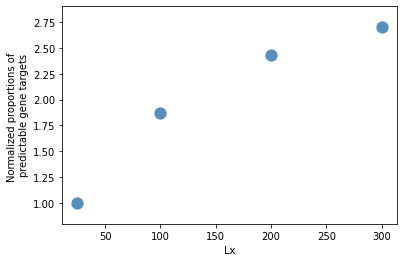

In [31]:
ax = sns.scatterplot(df_stats.Lx, df_stats.normalized,
                     s=150, alpha=0.9, linewidth=0, color='steelblue')
ax.set(xlabel='Lx', ylabel='Normalized proportions of \npredictable gene targets',
       ylim=[0.8,2.9])